### Task
1. Import pandas, numpy, matplotlib.pyplot
2. Read 'premium.csv' using pandas.
3. Scatter plot the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
import math
%matplotlib inline

In [2]:
df = pd.read_csv('premium.csv')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


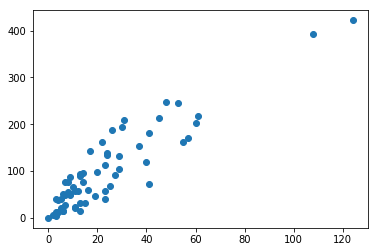

In [7]:
plt.scatter(df['X'],df['Y'])
plt.show()

### Task 
1. Find the mean for X and Y.

In [9]:
mean_x, mean_y = np.mean(df)
mean_x,mean_y

(22.904761904761905, 98.18730158730159)

### Task
1. Find the variance of X and Y.
2. Find the covariance of them.

In [19]:
var_x,var_y = np.var(df)
cov_xy = np.cov(df['X'],df['Y'])[0,1]
var_x,var_y,cov_xy

(536.6575963718822, 7505.052219702693, 1861.6036098310294)

### Task
1. Now look for the slope (b1) and the y-intercept (b0).

In [20]:
b_1 = cov_xy/var_x
b_0 = mean_y - b_1*mean_x
b_0, b_1 

(18.733311310273095, 3.4688852303900175)

### Task
1. Caluculate the predicted premium.
2. Attach it to the right end of the dataframe.

In [22]:
y_hat = b_0 + b_1*df['X']
df['Y_hat'] = y_hat
df.head()

,X,Y,Y_hat
0,108,392.5,393.372916
1,19,46.2,84.642131
2,13,15.7,63.828819
3,124,422.2,448.875080
4,40,119.4,157.488721


### Task
1. Scatter plot the dataframe, one with 'Y', the other with 'Predicted_Premium'.

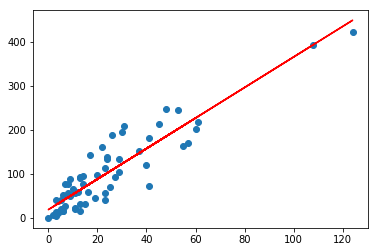

In [25]:
plt.scatter(df['X'],df['Y'])
plt.plot(df['X'],df['Y_hat'], color='r')
plt.show()

### Task
1. Using the given data, education and monthly_income, find the expected monthly income using linear regression.
2. Then, scatter plot them.

In [46]:
# Given
education = [6,8,11,12,12,13,14,16,16,21]
# education = [float(i) for i in education]
monthly_income = [1,1.5,1,2,4,2.5,5,6,10,8]


In [58]:
mu_e = np.mean(education)
mu_i = np.mean(monthly_income)
sig_e = np.var(education)
sig_i = np.var(monthly_income)
cov_ei = np.cov(education,monthly_income)[0,1]
b_1 = cov_ei/sig_e
b_0 = mu_i - b_1*mu_e
i_hat = []
for i in education:
    i_hat.append(i*b_1)
i_hat = i_hat + b_0

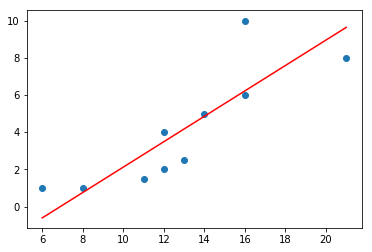

In [59]:
plt.scatter(education,monthly_income)
plt.plot(education,i_hat, color='r')
plt.show()

### Extra
-- Simple linear regression using OLS (ORdinary Least Squares).

http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

-- sklearn.linear_models.LinearRegression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [61]:
import statsmodels.api as sm

In [69]:
model = sm.OLS(education, monthly_income)
results = model.fit()
results.params
pred = model.predict(results.params)
pred

array([ 2.46183953,  2.46183953,  3.6927593 ,  4.92367906,  9.84735812,
        6.15459883, 12.30919765, 14.77103718, 24.6183953 , 19.69471624])